In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('udemy_courses.csv')

### Basic info about your data set

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [4]:
 #in these column name publish_timestamp is object data type we need into convert into datatime dtype
data['published_timestamp']=pd.to_datetime(data['published_timestamp'])

In [5]:
data.shape  #total number of rows and columns

(3678, 12)

### Finding any Null Value in data set

In [6]:
data.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

There is no null value in any columns

### Check for the duplicate Data

In [7]:
data.duplicated().sum() # there are six duplicate value

6

### Removing the duplicated value by DROP DUPLICATED medthod

In [8]:
data.drop_duplicates().shape

(3672, 12)

### Changing columns name as per our needs and Satisfaction

In [9]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [10]:
data.columns=['CourseID','CourseTitle','Link','Version','Price',
             'Subscribers','Reviews.No','Lectures','Level','Duration',
             'ReleasedDate','Subject']

### Changing Version column data true or false to Paid or free

In [11]:
data['Version']=data['Version'].replace({True:'Paid',False:'Free'})

In [12]:
data.head(2)

,CourseID,CourseTitle,Link,Version,Price,Subscribers,Reviews.No,Lectures,Level,Duration,ReleasedDate,Subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance


### Find out numbers of courses as per subjects

In [13]:
data['Subject'].value_counts()

Subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64

### For Which level Udemy Courses Providing the courses

In [14]:
data['Level'].value_counts()

Level
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

In [15]:
#sns.countplot(data['Level'])
#plt.xlabel1('Level',fontsize=13)
#plt.ylabel1('Number of courses per level',fontsize=13)
#plt.xticks(roation=65)
#plt.show()

### Display the Number of people who buy paid course or free course

In [16]:
data['Version'].value_counts()

Version
Paid    3368
Free     310
Name: count, dtype: int64

There are 3368 paid courses and 310 free courses

### In which course have a higher number of subscriber Free or Paid

In [18]:
data.groupby('Subject')['Version'].value_counts().reset_index()

,Subject,Version,count
0,Business Finance,Paid,1099
1,Business Finance,Free,96
2,Graphic Design,Paid,568
3,Graphic Design,Free,35
4,Musical Instruments,Paid,634
5,Musical Instruments,Free,46
6,Web Development,Paid,1067
7,Web Development,Free,133


### Which Level has the Highest Number of Subscribers?

In [51]:
data.head(2)

,CourseID,CourseTitle,Link,Version,Price,Subscribers,Reviews.No,Lectures,Level,Duration,ReleasedDate,Subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance


In [59]:
data.groupby('Level')['Subscribers'].sum()

Level
All Levels            6915076
Beginner Level        4051843
Expert Level            50196
Intermediate Level     742005
Name: Subscribers, dtype: int64

### Find Most Popular Course Title

In [65]:
data[data['Subscribers'].max()==data['Subscribers']]

,CourseID,CourseTitle,Link,Version,Price,Subscribers,Reviews.No,Lectures,Level,Duration,ReleasedDate,Subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,Free,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development


### Display 10 Most Popular Courses as Per Numbers of  Subscribers

In [73]:
data.sort_values('Subscribers',ascending=False).head(10)[['CourseTitle','Subscribers']].reset_index()

,index,CourseTitle,Subscribers
0,2827,Learn HTML5 Programming From Scratch,268923
1,3032,Coding for Entrepreneurs Basic,161029
2,3230,The Web Developer Bootcamp,121584
3,2783,Build Your First Website in 1 Week with HTML5 ...,120291
4,3232,The Complete Web Developer Course 2.0,114512
5,1896,Free Beginner Electric Guitar Lessons,101154
6,2589,Web Design for Web Developers: Build Beautiful...,98867
7,2619,Learn Javascript & JQuery From Scratch,84897
8,3289,Practical PHP: Master the Basics and Code Dyna...,83737
9,3247,JavaScript: Understanding the Weird Parts,79612


Top 10 most popular Courses as per the subscribers

### Find the Course Which is Having The Highest Number of Reviews

In [74]:
data.head(2)

,CourseID,CourseTitle,Link,Version,Price,Subscribers,Reviews.No,Lectures,Level,Duration,ReleasedDate,Subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance


In [78]:
data.sort_values('Reviews.No',ascending=False).head(10)[['CourseTitle','Reviews.No']].reset_index()

,index,CourseTitle,Reviews.No
0,3230,The Web Developer Bootcamp,27445
1,3232,The Complete Web Developer Course 2.0,22412
2,3204,Angular 4 (formerly Angular 2) - The Complete ...,19649
3,3247,JavaScript: Understanding the Weird Parts,16976
4,3254,Modern React with Redux,15117
5,3246,Learn and Understand AngularJS,11580
6,3251,Learn and Understand NodeJS,11123
7,2827,Learn HTML5 Programming From Scratch,8629
8,3228,Angular 2 with TypeScript for Beginners: The P...,8341
9,1979,Pianoforall - Incredible New Way To Learn Pian...,7676


These is Top 10 most review courese

### Does Price Affect Number of Reviews

<Axes: xlabel='Price', ylabel='Reviews.No'>

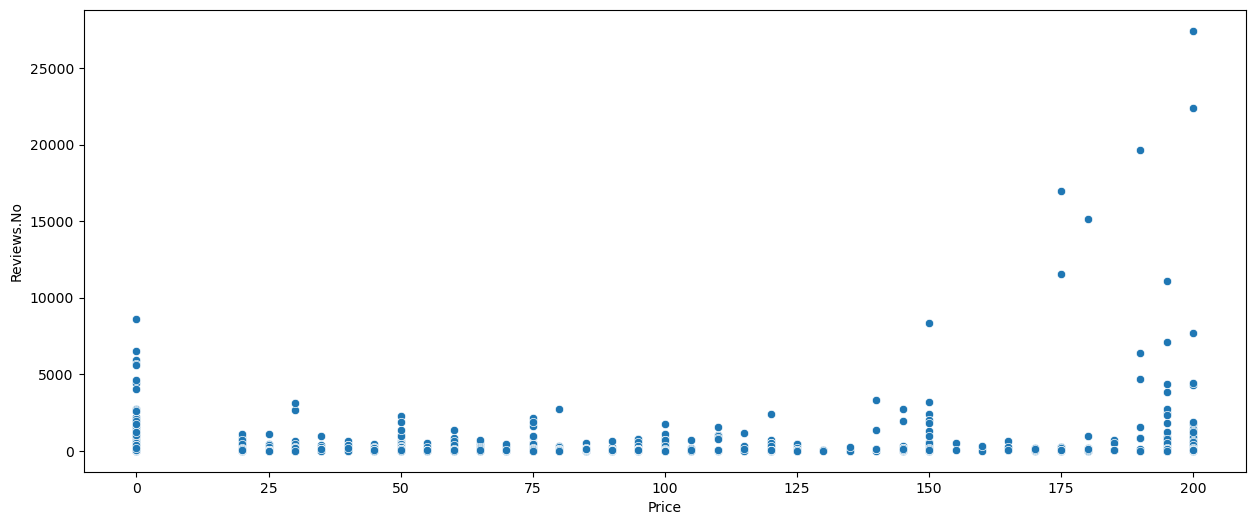

In [82]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Price',y='Reviews.No',data=data)

By these Graph we can clearly say that Price directly affect Numbers of Revirews

### Find Total Number of Course Related to Python

In [91]:
data[data['CourseTitle'].str.contains('Python')]['CourseTitle'].count()

29

There are 29 courses which are related to python

### Display 10 Most Popular Python Course As Per Number Of Subscribers

In [98]:
python=data[data['CourseTitle'].str.contains('Python')].sort_values('Subscribers',ascending=False).head(10)[['CourseTitle','Subscribers']]
python

,CourseTitle,Subscribers
2497,Web Programming with Python,35267
2570,"Coding for Entrepreneurs: Learn Python, Django...",23412
2528,Learn Python and Django: Payment Processing,17714
3200,Python and Django Full Stack Web Developer Boo...,11832
3507,Fun and creative web engineering with Python a...,10917
2553,The Complete Ethical Hacking Course 2.0: Pytho...,7827
3138,Complete Python Web Course: Build 8 Python Web...,7489
3197,Try Django 1.9 | Build a Blog and Learn Python...,7407
2681,Python for Beginners: Python Programming Langu...,6153
3203,REST APIs with Flask and Python,5151


<Axes: xlabel='Subscribers', ylabel='CourseTitle'>

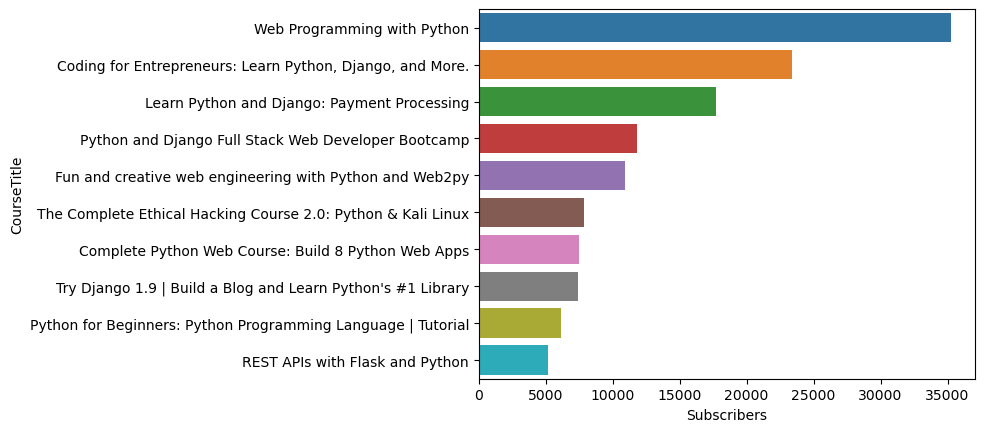

In [99]:
sns.barplot(x='Subscribers',y='CourseTitle',data=python)

### In Which Year Highest Number Of Courses Were Posted

In [100]:
data.head(2)

,CourseID,CourseTitle,Link,Version,Price,Subscribers,Reviews.No,Lectures,Level,Duration,ReleasedDate,Subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance


In [104]:
data['Year']=data['ReleasedDate'].dt.year

In [105]:
data.head(2)

,CourseID,CourseTitle,Link,Version,Price,Subscribers,Reviews.No,Lectures,Level,Duration,ReleasedDate,Subject,Year
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,Paid,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,2017
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,Paid,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,2017


In [121]:
data['Year'].value_counts()

Year
2016    1206
2015    1014
2017     715
2014     491
2013     202
2012      45
2011       5
Name: count, dtype: int64

It shows in which year how many courses launched by Udemy

### Display Category Wise and Year Wise Count of Posted Subjects 

In [129]:
data.groupby('Year')['Subject'].value_counts().reset_index()

,Year,Subject,count
0,2011,Web Development,5
1,2012,Web Development,19
2,2012,Musical Instruments,10
3,2012,Graphic Design,10
4,2012,Business Finance,6
5,2013,Business Finance,84
6,2013,Web Development,56
7,2013,Musical Instruments,39
8,2013,Graphic Design,23
9,2014,Business Finance,192
